In [19]:
# 1. Imports
import pandas as pd
import sys
sys.path.append('../src')

# 2. Load Cleaned Data
df_dep = pd.read_csv('../data/processed/dependency_ratio.csv')
df_health = pd.read_csv('../data/processed/health_expenditure_long.csv')
df_rd = pd.read_csv('../data/processed/rd_expenditure_long.csv') 
df_contr = pd.read_csv('../data/processed/contribution_revenue_long.csv')
df_gdp = pd.read_csv('../data/processed/GDP_percapita_clean.csv')
df_edu = pd.read_csv('../data/processed/Education_perGDP_clean.csv')

# 3. Merge (sequentially)
merged = df_dep.merge(df_health, on=["ISO3", "Year", "Country"], how="outer")
merged = merged.merge(df_rd, on=["ISO3", "Year", "Country"], how="outer")
merged = merged.merge(df_contr, on=["ISO3", "Year", "Country"], how="outer")
merged = merged.merge(df_gdp, on=["ISO3", "Year", "Country"], how="outer")
merged = merged.merge(df_edu, on=["ISO3", "Year", "Country"], how="outer")

# 4. Save merged data
merged.to_csv('../data/processed/merged_all_data.csv', index=False)

# 5. Show
merged.head()


,Country,ISO3,Year,Dependency_Ratio,Health_Expenditure,RD_Expenditure,Contribution_revenue,GDP_percapita,Education_perGDP
0,Andorra,AND,2000,38.260924,5.952764,NaN,NaN,21810.248743,NaN
1,Andorra,AND,2001,38.989848,5.858237,NaN,NaN,23511.295148,NaN
2,Andorra,AND,2002,39.556404,5.996212,NaN,NaN,26528.130158,1.65971
3,Andorra,AND,2003,38.880339,5.547715,NaN,NaN,34063.578403,NaN
4,Andorra,AND,2004,37.326780,5.288469,NaN,NaN,39021.127810,1.54412


In [20]:
# How many % is missing?
merged.isna().mean().sort_values(ascending=False)


Contribution_revenue    0.476190
Education_perGDP        0.446429
RD_Expenditure          0.313244
Health_Expenditure      0.054315
GDP_percapita           0.004464
Country                 0.000000
ISO3                    0.000000
Year                    0.000000
Dependency_Ratio        0.000000
dtype: float64

<Axes: >

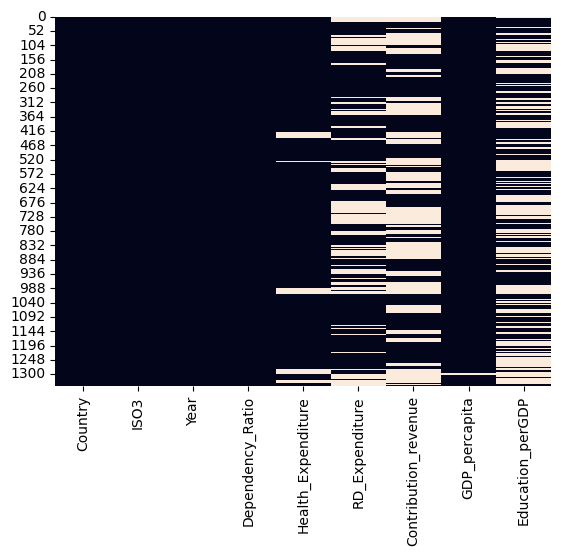

In [21]:
# Show missing in heatmap
import seaborn as sns
sns.heatmap(merged.isna(), cbar=False)

In [22]:
# Drop missing value
merged_clean = merged.dropna()

# Save merge_clean
merged_clean.to_csv('../data/processed/merged_no_NaN.csv', index=False)


In [23]:
# Specific variable
main_cols = ["Health_Expenditure", "Dependency_Ratio", "GDP_percapita", "RD_Expenditure"]

# Drop rows where any of these are missing, but keep the full dataset
merged_clean_some = merged.dropna(subset=main_cols)

#save merge_clean_some
merged_clean_some.to_csv('../data/processed/merged_some_NaN.csv', index=False)

In [24]:
# Asses observations
print("Total merged (raw):", merged.shape[0])
print("Cleaned (only drop NaN in selected vars):", merged_clean_some.shape[0])
print("Cleaned (drop all NaNs):", merged_clean.shape[0])

Total merged (raw): 1344
Cleaned (only drop NaN in selected vars): 887
Cleaned (drop all NaNs): 384


In [25]:
# How many countries and years?
print("Countries in merged:", merged['ISO3'].nunique())
print("Years in merged:", merged['Year'].nunique())
print("Countries in merged_clean_some:", merged_clean_some['ISO3'].nunique())
print("Years in merged_clean_some:", merged_clean_some['Year'].nunique())
print("Countries in merged_clean:", merged_clean['ISO3'].nunique())
print("Years in merged_clean:", merged_clean['Year'].nunique())


Countries in merged: 64
Years in merged: 21
Countries in merged_clean_some: 55
Years in merged_clean_some: 21
Countries in merged_clean: 38
Years in merged_clean: 20
